# Assignment 1 - Social Graphs and Interactions (02805) 
## October 2nd, 2018

### Part One: Network Models

### 1. Watts-Strogatz Networks

* Use `nx.watts_strogatz_graph` to generate 3 graphs with 500 nodes each, average degree = 4, and rewiring probablity p = 0, 0.1, and 1. Calculate the average shortest path length $\langle d \rangle$ for each one. Describe what happens to the network when p = 1.
    * *As seen by the python code below the average shortest path length for the different graphs vary greatly. Graph 1 has 0 probability on being random, while with a 10% probability these 'short-cuts' are created that makes the average path length significally smaller.*
    * When p=1 the graph is completely random. Every edge is rewired independent


The average shortest path length for graph with p=0.0 is 62.875751503006015
The average shortest path length for graph with p=0.1 is 7.820240480961924
The average shortest path length for graph with p=1.0 is 4.774052104208417


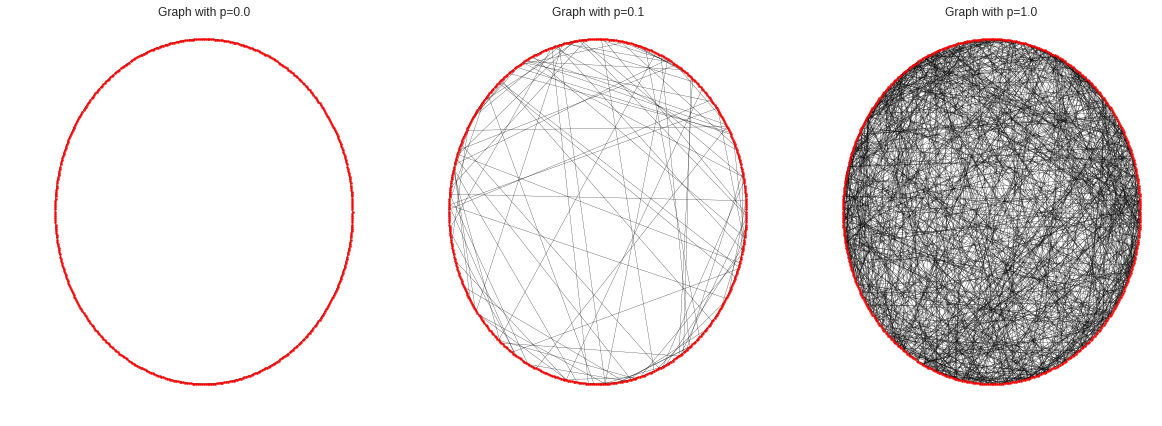

In [2]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

G1 = nx.watts_strogatz_graph(500, 4, 0)
G2 = nx.watts_strogatz_graph(500, 4, 0.1)
G3 = nx.watts_strogatz_graph(500, 4, 1)

print("The average shortest path length for graph with p=0.0 is %s" % nx.average_shortest_path_length(G1))
print("The average shortest path length for graph with p=0.1 is %s" % nx.average_shortest_path_length(G2))
print("The average shortest path length for graph with p=1.0 is %s" % nx.average_shortest_path_length(G3))

fig, axs = plt.subplots(ncols=3, figsize=(20, 7))
nx.draw_shell(G1, node_size=5, width=0.25, ax=axs[0])
axs[0].set_title('Graph with p=0.0')
nx.draw_shell(G2, node_size=5, width=0.25, ax=axs[1])
axs[1].set_title('Graph with p=0.1')
nx.draw_shell(G3, node_size=5, width=0.25, ax=axs[2])
axs[2].set_title('Graph with p=1.0')
plt.show()

* Generate 50 networks with $N = 500$, $\langle k \rangle = 4$, for each of $p = \{0, 0.01, 0.03, 0.05, 0.1, 0.2\}$. Calculate the average of $\langle d \rangle$ as well as the standard deviation over the 50 networks, to create a plot that shows how the path length decreases very quickly with only a little fraction of re-wiring. Use the standard deviation to add errorbars to the plot.


In [3]:

p = [0,0.01,0.03,0.05,0.1,0.2]
d = [[],[],[],[],[],[]]

print("start")

# Make 50x6 plots and calculate the average shortest path length of all networks
for i in range(0,6):
    for j in range(0,50):
        d[i].append(nx.average_shortest_path_length(nx.watts_strogatz_graph(500, 4, p[i])))
    print("Process at %s out of 6" % str(i+1))

#print("result: %s" % d)
        

start
Process at 1 out of 6
Process at 2 out of 6
Process at 3 out of 6
Process at 4 out of 6
Process at 5 out of 6
Process at 6 out of 6


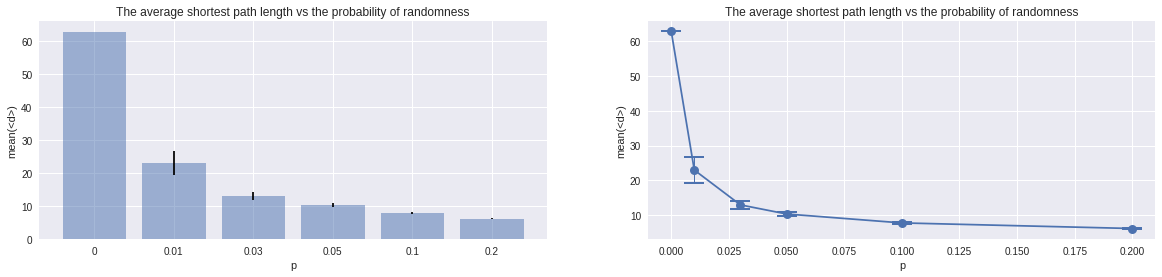

In [4]:
# Calculate mean + std for all p
d_mean = [0,0,0,0,0,0]
d_std = [0,0,0,0,0,0]

for i in range(0, len(d)):
    d_std[i] = np.std(d[i])
    d_mean[i] = np.mean(d[i])
    
    
fig, axs = plt.subplots(ncols=2, figsize=(20, 4))

# Plot 1 - Bar graph with errorbars
x_pos = np.arange(len(p))
# Build the plot
axs[0].bar(x_pos, d_mean, yerr=d_std, align='center', alpha=0.5, ecolor='black', capsize=10)
axs[0].set_ylabel('mean(<d>)')
axs[0].set_xlabel('p')
axs[0].set_xticks(x_pos)
axs[0].set_xticklabels(p)
axs[0].set_title('The average shortest path length vs the probability of randomness')
axs[0].yaxis.grid(True)


# Plot 2 - Line graph with errorbars
plt.errorbar(p, d_mean, d_std, fmt='-o', capsize=10, elinewidth=1,markeredgewidth=2)
axs[1].set_ylabel('mean(<d>)')
axs[1].set_xlabel('p')
axs[1].set_title('The average shortest path length vs the probability of randomness')

# Show the figure
plt.show()

### 2. The Barabasi-Albert Model

We're going to create our own Barabasi-Albert model (a special case) in right in a `notebook`. Follow the recipe below for success

* Create a 100 node BA network using a BA model that you've coded on your own (so don't use the built-in NetworkX function, but the one you created during week 3). And plot it using NetworkX.
* Now create a 5000 node network.


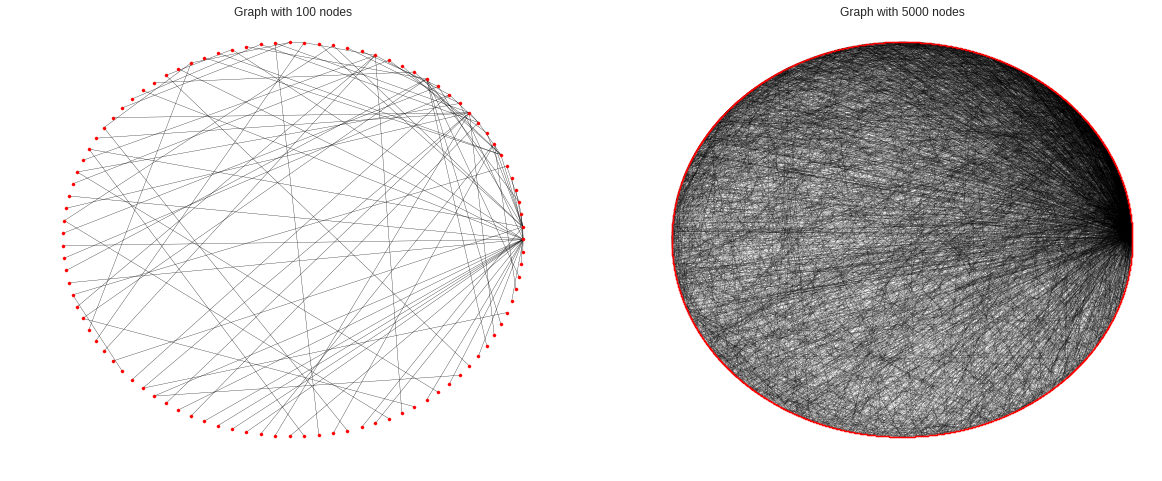

In [5]:
import random

# Function for BA network 
def create_BA_network(no_of_nodes):
  G = nx.Graph()
  G.add_edge(1, 2)
  
  # Connect a new node to a random node in G:
  for i in range(3, no_of_nodes):
    nodes = [n for tuple in G.edges() for n in tuple]
    rn = random.choice(nodes)
    G.add_edge(i,rn)
  return G

G100 = create_BA_network(100)
G5000 = create_BA_network(5000)

# plot resultning network
fig, axs = plt.subplots(ncols=2, figsize=(20, 8))
nx.draw_shell(G100, node_size=10, with_labels=False, width=0.3, ax=axs[0])
axs[0].set_title('Graph with 100 nodes')
nx.draw_shell(G5000, node_size=1, with_labels=False, width=0.1, ax=axs[1])
axs[1].set_title('Graph with 5000 nodes')
plt.show()

 * The 5000 node network.
  * What's the maximum and minimum degree?
  * Now, bin the degree distribution, for example using `numpy.histogram`.
  * Plot the distribution. Plot it with both linear and log-log axes.





min: 1 and max: 23 and average: 1.96
min: 1 and max: 130 and average: 1.9992


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/numpy/core/function_base.py:133: RuntimeWarning: invalid value encountered in multiply
  y *= step
/usr/local/lib/python3.6/dist-packages/numpy/core/function_base.py:142: RuntimeWarning: invalid value encountered in add
  y += start
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:725: RuntimeWarning: invalid value encountered in greater
  if np.any(bin_edges[:-1] > bin_edges[1:]):


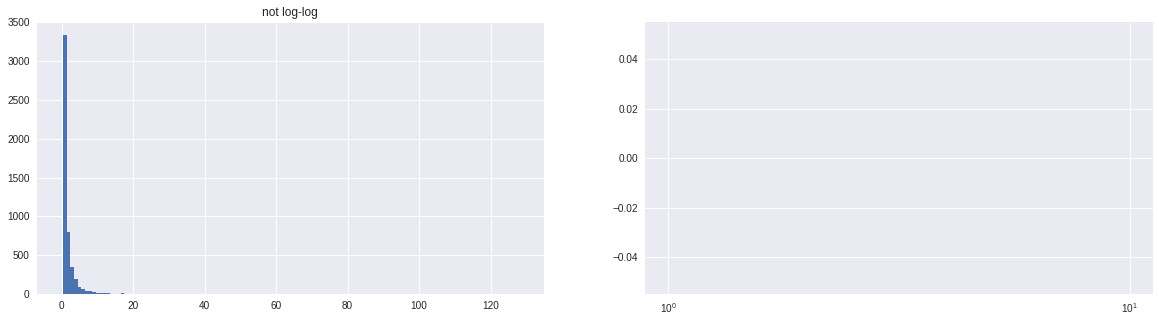

In [6]:
import pandas as pd

# Calculate and print minimum, maximum, and average degree of the BA graph
def print_degree_info(G, no_of_nodes):
  min = no_of_nodes
  max = 0
  average = 0
  for n in G.degree():
    average += n[1]
    if n[1] > max:
      max = n[1]
    elif n[1] < min:
      min = n[1]
  average = average/no_of_nodes 
  print("min: %s and max: %s and average: %s" % (min, max, average))
  return [min,max,average]
  
degree_info_g100 = print_degree_info(G100, 100)
degree_info_g5000 = print_degree_info(G5000, 5000)


# plot histogram
g5000 = []
[g5000.append(degree[1]) for degree in G5000.degree()]

fig, axs = plt.subplots(ncols=2, figsize=(20, 5))

hist, bin_edges = np.histogram(g5000, bins = range(degree_info_g5000[1]))
axs[0].bar(bin_edges[:-1], hist, width = 1)
axs[0].set_title('not log-log')


# histogram on log scale. 
# Use non-equal bin sizes, such that they look equal on log scale.
logbins = np.logspace(np.log10(bin_edges[0]),np.log10(bin_edges[-1]),len(bin_edges))
plt.hist(g5000, bins=logbins)
plt.xscale('log')
plt.show()


#hist = np.log10(g5000 + 1)

#hist_log, bin_edges_log = np.histogram(hist, log=True, bins = range(degree_info_g5000[1]))
#axs[1].bar(10**bin_edges_log[:-1], hist_log, width = 1)
#axs[1].set_title('log-log')

#plt.show()



## 3. Power-laws and the friendship paradox

Next step is to explore the [Friendship paradox](https://en.wikipedia.org/wiki/Friendship_paradox). This paradox states that ''almost everyone'' have fewer friends than their friends have, on average. This sounds crazy, but is actually an almost trivial consequence of living in a social network with a power-law degree distribution. The explanation is that almost everyone is friends with a hub, that drives up the average degree of the friends. Let's explore that in the 5000 node BA network we've just generated. Do the following:

* Pick a node $i$ at random (e.g. use `random.choice`). [Find its degree](http://networkx.lanl.gov/reference/generated/networkx.Graph.degree.html).
* Find $i$'s [neighbors](http://networkx.lanl.gov/reference/generated/networkx.Graph.neighbors.html). And calculate their average degree.
* Compare the two numbers to check if it's true that $i$'s friends (on average) have more friends than $i$.
* Do this 1000 times. How many out of those 1000 times is the friendship paradox true?

In [17]:
# Pick a node i at random: 
nodes = list(G5000.nodes)
rndm_i = random.choice(nodes)
# Find its degree:
rndm_i_degree = G5000.degree(rndm_i)
print("The random node, %s, has the degree: %s" % (rndm_i, rndm_i_degree))

# Find i's neighbors:
nb_i = list(G5000.neighbors(rndm_i))
print("i's neighbors are: %s" % nb_i)
# Calculate their average degree:
nb_i_degrees = [x[1] for x in G5000.degree(nb_i)]
nb_i_avg_degrees = np.mean(nb_i_degrees)
print("The average degree for i's neighbors is: %s" % nb_i_avg_degrees)

# Compare the two numbers to check if it's true that i's friends (on average) have more friends than  i:
fs_paradox_bool = nb_i_avg_degrees > rndm_i_degree
print("It is %s that i's friends (on average) have more friends than i." % fs_paradox_bool)

# Do it 1000 times:
count = 0
for x in range(1001):
  rndm_i = random.choice(nodes)
  rndm_i_degree = G5000.degree(rndm_i)
  nb_i = list(G5000.neighbors(rndm_i))
  nb_i_degrees = [x[1] for x in G5000.degree(nb_i)]
  nb_i_avg_degrees = np.mean(nb_i_degrees)
  fs_paradox_bool = nb_i_avg_degrees > rndm_i_degree
# How many out of those 1000 times is the friendship paradox true?  
  if fs_paradox_bool:
    count += 1
    
print("The friendship paradox is true %s out of 1000 times." % count)

The random node, 815, has the degree: 2
i's neighbors are: [116, 1470]
The average degree for i's neighbors is: 5.0
It is True that i's friends (on average) have more friends than i.
The friendship paradox is true 858 out of 1000 times.


### Part Two: The network of American politics

### 4. Basic stats for pages over time

Put together descriptive statistics for the US house of representatives over time (e.g. for the 113, 114 and 115th, congress).

* By the word member we mean a politician who has been elected to the house of representatives. Plot the number of members of the house of Representatives over time. You chose if you want to use a line-chart or a bar-chart. Is this development over time what you would expect? Why? Explain in your own words.


In [8]:
df_113 = pd.read_csv('H113.csv')
df_114 = pd.read_csv('H114.csv')
df_115 = pd.read_csv('H115.csv')

df_113['congress_no'] = 113
df_114['congress_no'] = 114
df_115['congress_no'] = 115

all_members= pd.concat([df_113, df_114, df_115]).reset_index(drop=True)

groups_name = all_members.groupby('WikiPageName')

individual_time_in_congress = groups_name.size().sort_values()
time_in_congress = individual_time_in_congress.groupby(individual_time_in_congress).size()


# Plot the number of members of the house of Representatives over time. 
# You chose if you want to use a line-chart or a bar-chart. 
# Is this development over time what you would expect? Why? Explain in your own words.
groups_congress_no = all_members.groupby('congress_no').size()
print(groups_congress_no, end='\n\n')
groups_congress_no.plot('line')
plt.show()

FileNotFoundError: ignored

* How many members appear in all the three congresses? How many in two? How many in one? Plot your results using a histogram.


In [2]:
print("Number of members only in one congress: %s" % time_in_congress[1])
print("Number of members in two congresses: %s" % (time_in_congress[2]))
print("Number of members in all three congresses: %s" % time_in_congress[3])

# Plot your results using a histogram.
time_in_congress.plot('bar')
plt.show()

NameError: ignored

* Which states are more represented in the house of representatives? Which are less? Plot a histogram showing the number of members per state.


In [0]:
# Which states are more represented in the house of representatives? 
groups_state = all_members.groupby('State').size()
sorted_groups_state = groups_state.sort_values(ascending=False)
print("Top 5 states with most represented: \n%s" % sorted_groups_state.head(n=5))

# Which are less? Plot a histogram showing the number of members per state.
sorted_groups_state.plot('bar')
plt.show()

* How has the party composition of the house of representative changed over time? Plot your results.

In [0]:
groups_party = all_members.groupby(['congress_no', 'Party']).size()
groups_party.plot('bar')
plt.show()

### 5. Basic stats for the network
Create simple network statistics for the 113th house of representatives.

* What is the number of nodes in the network? And the number of links?
* Plot the in and out-degree distributions.
* Who is the most connected representative?

In [0]:
print("The number of nodes in the 113th house of representatives' network is %s" % df_113.size())
print("The number of links in the 113th house of representatives' network is %s" % df_113.size())
